# The Sparks Foundation: #GRIPMAY21

## Data Science & Business Analytics
### Task-1: Prediction using Supervised ML
### Objectives:
1. **Predict the percentage of an student based on the no. of study hours.**
2. **What will be predicted score if a student studies for 9.25 hrs/ day?**

#### Author: `Chitrang Juneja`

## Reading and Understanding the Dataset
Importing warnings to be warned of situations that aren’t necessarily exceptions

In [1]:
import warnings
warnings.filterwarnings("ignore")

Importing the required libraries for our analysis 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

Importing the dataset from the remote data url and converting it into a dataframe named **`sparks_df`**<br>
URL: "http://bit.ly/w-data"

In [3]:
url = "http://bit.ly/w-data"
sparks_df = pd.read_csv(url)

In [4]:
sparks_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Inspecting the Dataframes for precise analysis

In [5]:
sparks_df.shape

(25, 2)

In [6]:
sparks_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
sparks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


As we can see that our dataframe consists of all Non-Null values, we can now proceed for further analysis

## Data Visualization

**Plotting the distribution of scores to see if we can visualize any important information from our dataset**

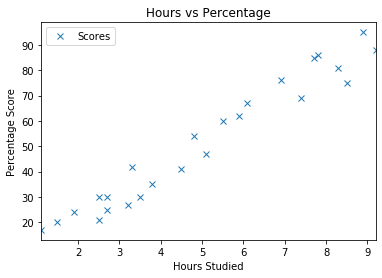

In [8]:
sparks_df.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**We can clearly visualize form the above graph, that there is a positive linear relation between the `number of hours studied` and the `percentage score`.**

## Preparing the data
Our next step in analysis is to divide the data into "Attributes" and "Labels"

**sparks_X**: **`Hours`**(Predictor Variable)<br>
**sparks_y**: **`Scores`**(Output Variable)

In [9]:
sparks_X = sparks_df.iloc[:, :-1].values  
sparks_y = sparks_df.iloc[:, 1].values  

## Splitting the Data into Training and Testing Sets
The very basic step towards our model building is to perfrom a train-test split

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(sparks_X, sparks_y, 
                            test_size=0.2, random_state=0) 

## Model Buidling

**Now our next step is to train the algorithm. So we will train the Simple Linear Regression Model on our training & testing sets.**

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualization of results on our trained set.
Plotting the regression line

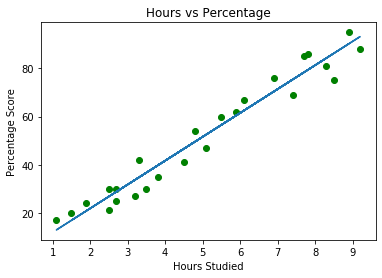

In [12]:
line = regressor.coef_*sparks_X+regressor.intercept_

plt.scatter(sparks_X, sparks_y, color='green')
plt.plot(sparks_X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## **Making Predictions**
Predicting the results on our Testing data

In [13]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual vs Predicted**

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing with our own data
Predicted score if a student studies for 9.25 hrs/ day

In [15]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Our model predicts that if a student studies for 9.25 hrs/day then he will score 93.69% marks**

## Model Evaluation

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('R Squared Score:',
     metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R Squared Score: 0.9454906892105356


**In the final step we have evaluated the performance of our algorithm.<br> 
We have used 2 metrics for our evaluation:**<br>
1) `Mean Absolute Error`: 4.183859899002975<br>
2) `R Squared Score`: 0.9454906892105356

**Our metrics, MAE is 4.183 and R2 Score is 0.945 which are pretty good, hence we can say that our Supervised Learning Model is a good one.**